In [ ]:
# The aim of this exercise is to fit a multi-polynomial regression curve on the data and then plot a 
# decision boundary around this data such that the division between the classes is clearly visible 
# as shown in the figure below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("land_type.csv")
df.head()

,latitude,longitude,land_type
0,-3.226989,-0.356542,0.0
1,-1.496209,0.416730,1.0
2,0.995726,-0.887490,1.0
3,0.633447,-1.898605,1.0
4,-0.076218,-0.794730,1.0


In [4]:
X = df.drop('land_type', axis=1)
y = df['land_type']

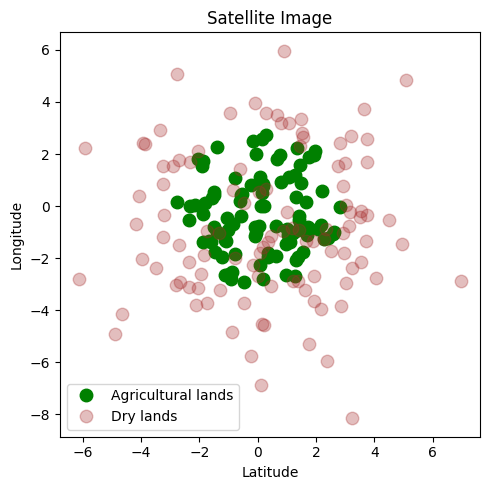

In [6]:
# To visualise the trend, plot the response variables with the predictors (Latitude & Longitude)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Define the column names
latitude_col = 'latitude'
longitude_col = 'longitude'

# Plot the latitude vs longitude values for y==1
ax.plot(df[latitude_col][y==1], df[longitude_col][y==1], 'o', c='green', markersize=9, label='Agricultural lands')

# Repeat the same, but for y==0
ax.plot(df[latitude_col][y==0], df[longitude_col][y==0], 'o', c='brown', markersize=9, label='Dry lands', alpha=0.3)

# Add labels
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=22)

In [16]:
# Make a logistic regression model with below given C value

cval = 1e-5

lr = LogisticRegression(C=cval, max_iter=16000)

# Use Polynomial features to make a response variable of degree 10

degree = 10

polyfeatures = PolynomialFeatures(degree)

X_poly_train = polyfeatures.fit_transform(X_train)

X_poly_val = polyfeatures.fit_transform(X_val)

In [18]:
### edTest(test_accuracy) ###

# Fit the model with training data 

lr.fit(X_poly_train, y_train)

# Make predictions on the validation data

y_val_pred = lr.predict(X_poly_val)

validation_accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy=",validation_accuracy)

Accuracy= 0.75


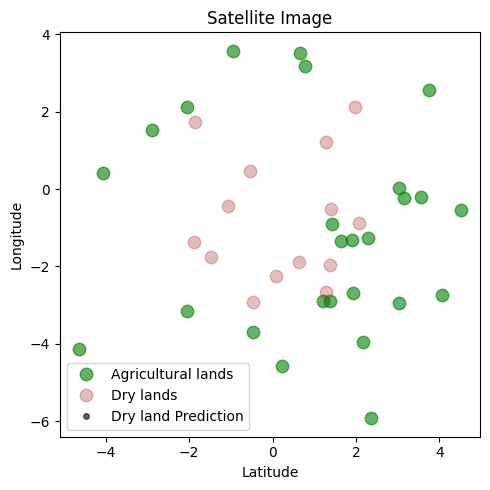

In [10]:
# Use the below helper code to visualise the number of dry land predictions our model got correct

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

xlat_0 = X_val.values[y_val==0,0]
xlong_0 = X_val.values[y_val==0,1]

ax.plot(xlat_0, xlong_0, 'o',c='green',alpha = 0.6, markersize=9,label='Agricultural lands')

xlat_1 = X_val.values[y_val==1,0]
xlong_1 = X_val.values[y_val==1,1]

ax.plot(xlat_1, xlong_1, 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

xlat_pred_1 = X_val.values[y_val_pred==1,0]
xlong_pred_1 = X_val.values[y_val_pred==1,1]
ax.plot(xlat_pred_1, xlong_pred_1, 'o',c='black', alpha = 0.6, markersize=4,label='Dry land Prediction')


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [11]:
new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 3, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

X = new_data[:, :-1]
y = new_data[:, -1]

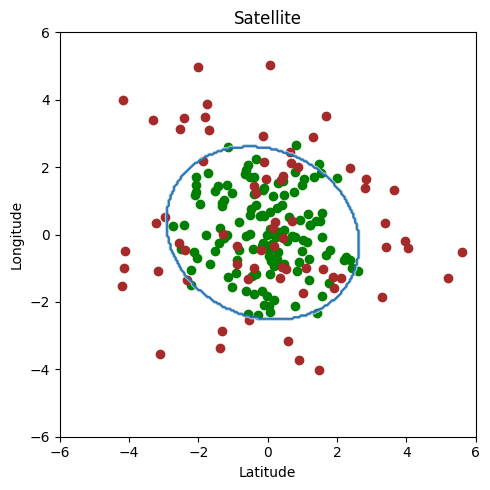

In [14]:
# We will use a custom function called fit_and_plot_dt
# If you are curious about it, look for the file `helper.py` in the root directory

from helper2 import fit_and_plot_dt

fig, ax = plt.subplots(figsize=(5, 5))

# Choose the C_value and the degree of the polynomial for the polynomial logistic regression
# A C value of 1e15 is extremely large and the equivalent of no regularization  

C_value = 1e15

degree = 2

# The helper function below

ax = fit_and_plot_dt(X, y, C_value, 'Satellite',ax, plot_data=True, fill=False,degree=degree) 

# Setting the limits to better visualsize the plot

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.tight_layout()
plt.show() 